## A Comprehensive Report On Commercial Real Estate Trends in Lagos

##### _Focusing on the four(4) Major Cities_ 

* Ikeja 
* Lekki
* Victoria Island 
* Ikoyi


### Objectives

### Why is the Analysis of Commercial Real Estate Trends in Lagos Crucial?

As of the UN's 2022 population data, Nigeria's urbanization rate stands at an astonishing 53% of the total population. Among the array of alluring urban destinations for rural-to-urban migration are major cities such as Port Harcourt, Abuja, Benin, Delta, Ibadan, and Kano. However, it is Lagos, above all others, that shoulders the heaviest burden of this population influx.

Lagos state, according to the Nigeria Bureau of Statistics, boasts the highest urban population count at 15 million and has maintained the highest population growth rate over the past decade
Projections indicate that this trend is expected to persist in the next 10 years.As Real Estate professionals strive to accommodate this burgeoning population, it is important to scrutinize the commercial real estate sector, which plays a pivotal role in influencing the decisions of those choosing to call the city home. 

This study aims to shed light on the key factors shaping the commercial real estate landscape, the profound impact of location on rental and sales prices of commercial properties, and, ultimately, provide robust recommendations for commercial real estate investments based on the insights gleaned from our analysis.








In [4]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

##### Let's import the datsets



In [5]:
#Data Source: Kaggle Data, nigeriapropertycentre.com, propertypro.

lagcom=pd.read_csv('lagoscommercial.csv')
rentdata=pd.read_csv('comrent.csv')

#### Wrangling Data to ensure Data Quality and Reliability

In [6]:
lagcom.head()

,Title,Address,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City
0,Office Building,Ribadu Ikoyi S.w Ikoyi Lagos,650000000,1,1,0,1.0,0.0,1.0,Ikoyi
1,Hotel,Ikoyi Lagos,15000000,0,0,0,0.0,0.0,0.0,Ikoyi
2,"4 Bedroom Terrace With Swimming Pool, Gym, Hom...",Banana Island Ikoyi Lagos,260000000,1,0,0,4.0,4.0,5.0,Ikoyi
3,A Newly Built Serviced Four(4) Storey Commerci...,Ikoyi S.w Ikoyi Lagos,80000000,0,0,0,NaN,NaN,NaN,Ikoyi
4,An Executive Hotel Of 58 Rooms,Old Ikoyi Ikoyi Lagos,15000000,0,0,0,0.0,0.0,0.0,Ikoyi


In [7]:
#Handling missing input,replace null values with '0'
lagcom[['Bedrooms','Bathrooms','Toilets']]=lagcom[['Bedrooms','Bathrooms','Toilets']].fillna('0')
lagcom.head()

,Title,Address,Price,Serviced,Newly Built,Furnished,Bedrooms,Bathrooms,Toilets,City
0,Office Building,Ribadu Ikoyi S.w Ikoyi Lagos,650000000,1,1,0,1.0,0.0,1.0,Ikoyi
1,Hotel,Ikoyi Lagos,15000000,0,0,0,0.0,0.0,0.0,Ikoyi
2,"4 Bedroom Terrace With Swimming Pool, Gym, Hom...",Banana Island Ikoyi Lagos,260000000,1,0,0,4.0,4.0,5.0,Ikoyi
3,A Newly Built Serviced Four(4) Storey Commerci...,Ikoyi S.w Ikoyi Lagos,80000000,0,0,0,0,0,0,Ikoyi
4,An Executive Hotel Of 58 Rooms,Old Ikoyi Ikoyi Lagos,15000000,0,0,0,0.0,0.0,0.0,Ikoyi


In [8]:
#checking duplicates and other missing values
lagcom.duplicated().value_counts()
lagcom.isnull().value_counts()


Title  Address  Price  Serviced  Newly Built  Furnished  Bedrooms  Bathrooms  Toilets  City 
False  False    False  False     False        False      False     False      False    False    1304
dtype: int64

In [9]:
#checking data format
lagcom.dtypes

Title          object
Address        object
Price           int64
Serviced        int64
Newly Built     int64
Furnished       int64
Bedrooms       object
Bathrooms      object
Toilets        object
City           object
dtype: object

In [10]:
#Normalizing data types
lagcom[['Furnished','Bedrooms','Bathrooms','Toilets']].astype(int)
lagcom['Price'].astype(int)

0        650000000
1         15000000
2        260000000
3         80000000
4         15000000
           ...    
1299   -1794967296
1300      45000000
1301    2115098112
1302      45000000
1303     700000000
Name: Price, Length: 1304, dtype: int32

#### let's extract the specific loation from the address column


In [11]:
#define a function that iterates the column and extract specific location of the property
def get_keyword(text):
    keywords=['Office','Hotel','Commercial', 'Restaurant','Warehouse']
    found_keywords=[]
    for keyword in keywords:
        if keyword in text:
            found_keywords.append(keyword)
    return ', '.join(found_keywords) if found_keywords else 'No Keywords Found'

lagcom['Property_Type']=lagcom['Title'].apply(get_keyword)

In [12]:
lagcom['Property_Type'].value_counts()

Hotel                            512
Commercial                       361
Office                           311
Office, Commercial                31
Office, Warehouse                 28
No Keywords Found                 27
Hotel, Restaurant                 11
Office, Hotel                      9
Hotel, Commercial                  5
Restaurant                         3
Warehouse                          2
Hotel, Warehouse                   2
Office, Commercial, Warehouse      1
Office, Hotel, Commercial          1
Name: Property_Type, dtype: int64

In [13]:
#Some of the properties are multipurpose, lets organize them in accordance with the distribution of the data

lagcom['Property_Type']=lagcom['Property_Type'].str.replace('Office, Commercial','Office') 
lagcom['Property_Type']=lagcom['Property_Type'].str.replace('Office, Warehouse', 'Warehouse')
lagcom['Property_Type']=lagcom['Property_Type'].str.replace('No Keywords Found', 'Commercial')
lagcom['Property_Type']=lagcom['Property_Type'].str.replace('Hotel, Restaurant', 'Restaurant')

lagcom['Property_Type']=lagcom['Property_Type'].str.replace('Office, Hotel','Office')
lagcom['Property_Type']=lagcom['Property_Type'].str.replace('Hotel, Commercial', 'Commercial') 
lagcom['Property_Type']=lagcom['Property_Type'].str.replace('Hotel, Warehouse','Warehouse')
lagcom['Property_Type']=lagcom['Property_Type'].str.replace('Office, Commercial, Warehouse','Warehouse') 

lagcom['Property_Type']=lagcom['Property_Type'].str.replace('Commercial, Warehouse','Warehouse')
lagcom['Property_Type']=lagcom['Property_Type'].str.replace('Office, Commercial','Office') 
lagcom['Property_Type']=lagcom['Property_Type'].str.replace('Office, Hotel, Commercial','Office')  

In [14]:
lagcom['Property_Type'].value_counts()

Hotel         512
Commercial    393
Office        352
Warehouse      33
Restaurant     14
Name: Property_Type, dtype: int64

In [15]:
#let's do a basic statistics of our data
lagcom.describe()


,Price,Serviced,Newly Built,Furnished
count,1.304000e+03,1304.000000,1304.000000,1304.000000
mean,8.701696e+09,0.082822,0.095092,0.089724
std,1.670409e+11,0.275719,0.293455,0.285895
min,6.000000e+03,0.000000,0.000000,0.000000
25%,1.700000e+08,0.000000,0.000000,0.000000
50%,5.000000e+08,0.000000,0.000000,0.000000
75%,1.400000e+09,0.000000,0.000000,0.000000
max,5.000000e+12,1.000000,1.000000,1.000000


In [16]:
#handling errors in the price column
def limit_zero_to9(number):
    return min(number,10**10)
    
lagcom['Price']=lagcom['Price'].apply(limit_zero_to9)

In [17]:
lagcom.describe()

,Price,Serviced,Newly Built,Furnished
count,1.304000e+03,1304.000000,1304.000000,1304.000000
mean,1.331757e+09,0.082822,0.095092,0.089724
std,2.085257e+09,0.275719,0.293455,0.285895
min,6.000000e+03,0.000000,0.000000,0.000000
25%,1.700000e+08,0.000000,0.000000,0.000000
50%,5.000000e+08,0.000000,0.000000,0.000000
75%,1.400000e+09,0.000000,0.000000,0.000000
max,1.000000e+10,1.000000,1.000000,1.000000


In [18]:
#save the cleaned data
path=('cleanLagdata.csv')
lagcom.to_csv(path)

#### Now that we have cleaned and normalize our data, let us explore the data further with visualizations.

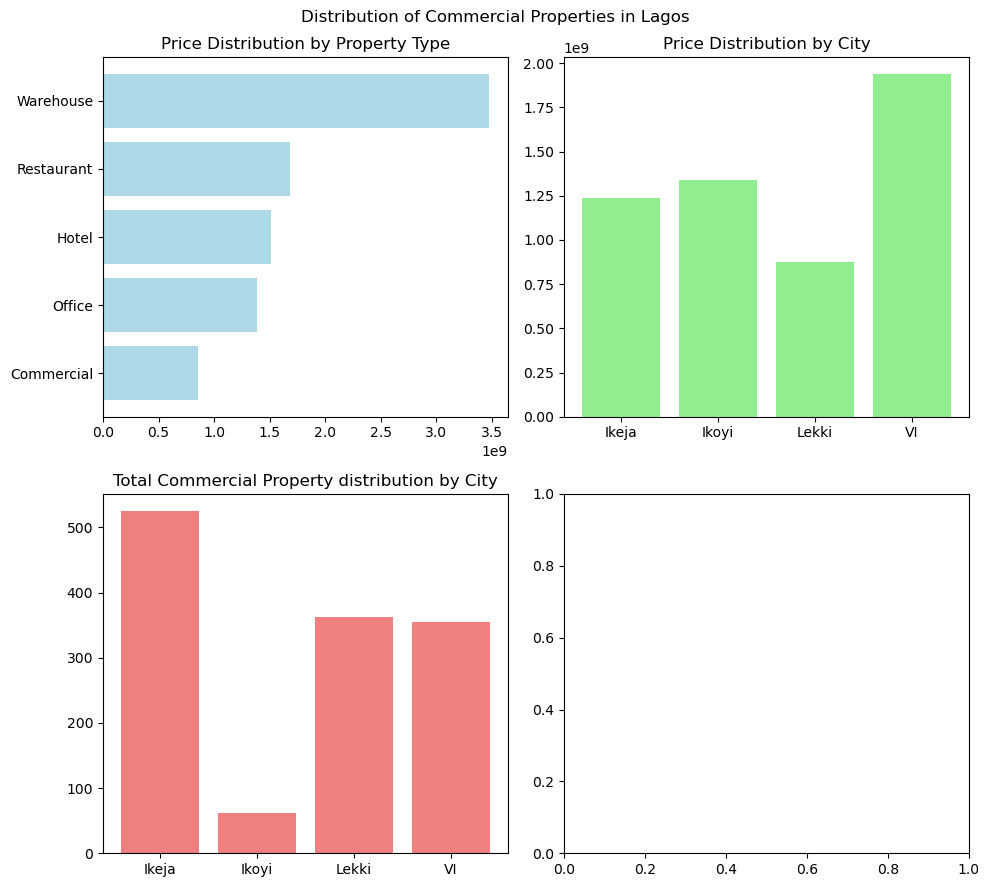

In [19]:
fig, ax= plt.subplots(2,2, figsize=(10,9))
fig.suptitle('Distribution of Commercial Properties in Lagos')

#distribution of price according to property type 
#(Note: the 'Commercial' category is used vaguely to represent sectors not identified specifically as any of the other categories)
typ=lagcom.groupby(['Property_Type'])['Price'].mean().sort_values(ascending=True)


ax[0,0].barh(typ.index,typ.values,color='lightblue')
ax[0,0].set_title('Price Distribution by Property Type') 

#Price Distribution by City
loc=lagcom.groupby(['City'])['Price'].mean()
ax[0,1].bar(loc.index,loc.values,color='lightgreen')
ax[0,1].set_title('Price Distribution by City')

#Commercial Property distribution by city
pdt=lagcom.groupby(['City'])['Property_Type'].count()
ax[1,0].bar(pdt.index,pdt.values,color='lightcoral')
ax[1,0].set_title('Total Commercial Property distribution by City')

plt.tight_layout()
plt.show()

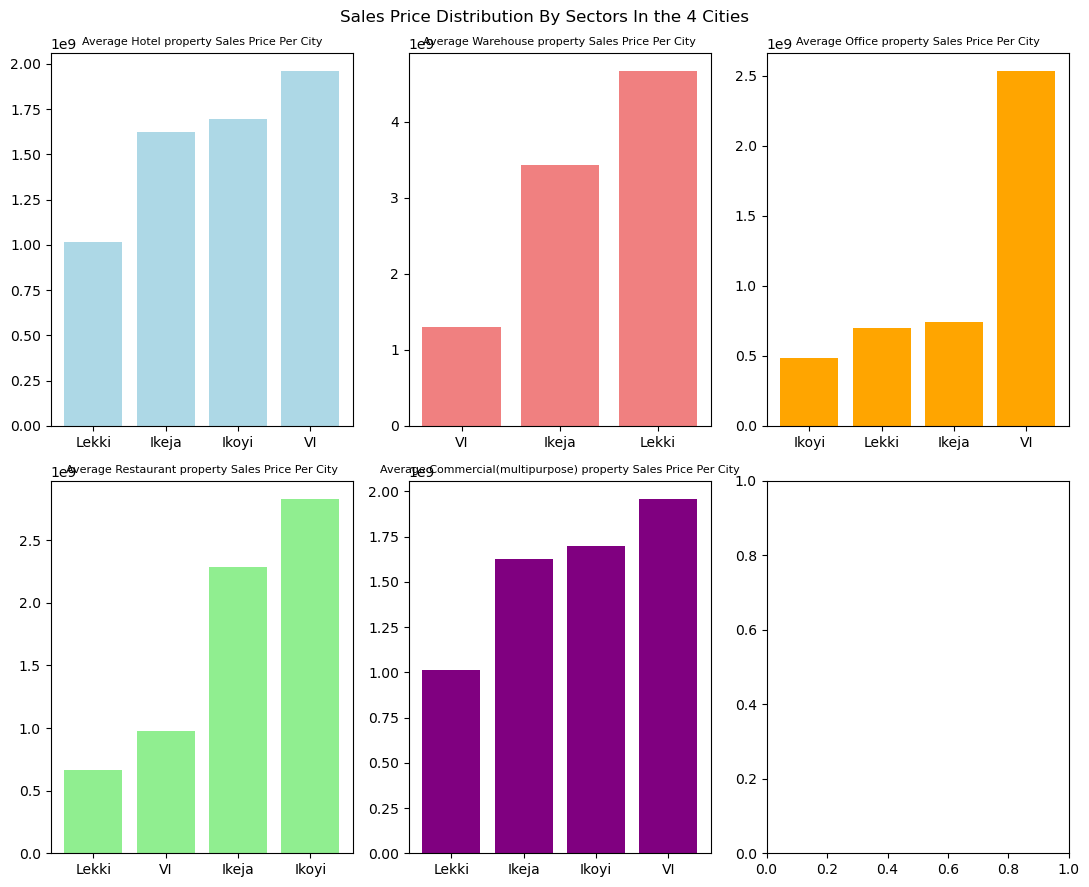

In [31]:
#price distribution by categories
fig, ax= plt.subplots(2,3, figsize=(11,9))
fig.suptitle('Sales Price Distribution By Sectors In the 4 Cities',fontsize=12)

htlp=lagcom[lagcom['Property_Type']=='Hotel']
de=htlp.groupby(['City'])['Price'].mean().sort_values(ascending=True)
ax[0,0].bar(de.index,de.values,color='lightblue')
ax[0,0].set_title('Average Hotel property Sales Price Per City',fontsize=8)


htlw=lagcom[lagcom['Property_Type']=='Warehouse']
dew=htlw.groupby(['City'])['Price'].mean().sort_values(ascending=True)
ax[0,1].bar(dew.index,dew.values,color='lightcoral')
ax[0,1].set_title('Average Warehouse property Sales Price Per City',fontsize=8)


htlpo=lagcom[lagcom['Property_Type']=='Office']
deo=htlpo.groupby(['City'])['Price'].mean().sort_values(ascending=True)
ax[0,2].bar(deo.index,deo.values,color='orange')
ax[0,2].set_title('Average Office property Sales Price Per City',fontsize=8)


htlpr=lagcom[lagcom['Property_Type']=='Restaurant']
der=htlpr.groupby(['City'])['Price'].mean().sort_values(ascending=True)
ax[1,0].bar(der.index,der.values,color='lightgreen')
ax[1,0].set_title('Average Restaurant property Sales Price Per City',fontsize=8)

htlpc=lagcom[lagcom['Property_Type']=='Commercial']
dec=htlpc.groupby(['City'])['Price'].mean().sort_values(ascending=True)
ax[1,1].bar(de.index,de.values,color='purple')
ax[1,1].set_title('Average Commercial(multipurpose) property Sales Price Per City',fontsize=8)

plt.tight_layout()
plt.show()


### Let us examine the rent data


#### For the purpose of this lab  we will focus on analyzing publicly accessible data pertaining to rental prices in quantifiable sectors:
Including: Commercial(multi purpose), Office, Hotel, and Warehouse

In [17]:
rentdata.head()

,Price,Property_description,Address,City,Property_type
0,912000000.0,4500sqm Warehouse,"Oregun,Ikeja, Lagos",Ikeja,Warehouse
1,713200000.0,60000sqft Warehouse,"On Kudirat Abiola Way, Oregun,Ikeja, Lagos",Ikeja,Warehouse
2,711480000.0,Newly Renovated Warehouse Capacity Of 4100sqm,"AcmeIkeja Industrial Area,Ikeja, Lagos",Ikeja,Warehouse
3,710800000.0,Warehouse Capacity Of 60000 Sqft With Office,"Industrial Area, Oregun,Ikeja, Lagos",Ikeja,Warehouse
4,515500000.0,Warehouse Capacity Of 6200sqm With Office,"Oba Akran,Ikeja, Lagos",Ikeja,Warehouse


In [18]:
rentdata['City'].value_counts()

Ikeja               664
Lekki               459
Victoria Island     312
Ikoyi               212
Lekki                14
Ikoyi                 9
Ikeja                 7
Victoria Island       6
 Ikeja                2
Lekki Phase I         1
Lekki.                1
Name: City, dtype: int64

In [20]:
#correct city column to the four unique cities
rentdata['City']=rentdata['City'].str.replace('Lekki ', 'Lekki')
rentdata['City']=rentdata['City'].str.replace('Ikoyi ', 'Ikoyi')
rentdata['City']=rentdata['City'].str.replace('Victoria Island ', 'Victoria Island')

rentdata['City']=rentdata['City'].str.replace('LekkiPhase I', 'Lekki')
rentdata['City']=rentdata['City'].str.replace('Lekki.', 'Lekki')
rentdata['City']=rentdata['City'].str.replace('Lekki     \  ', 'Lekki')
rentdata['City']=rentdata['City'].str.replace('Ikeja ', 'Ikeja')
rentdata['City']=rentdata['City'].str.replace(' Ikeja', 'Ikeja')

rentdata['City'].value_counts()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14440\2117109369.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  rentdata['City']=rentdata['City'].str.replace('Lekki.', 'Lekki')
C:\Users\Admin\AppData\Local\Temp\ipykernel_14440\2117109369.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  rentdata['City']=rentdata['City'].str.replace('Lekki     \  ', 'Lekki')


Ikeja              673
Lekki              475
Victoria Island    318
Ikoyi              221
Name: City, dtype: int64

In [21]:
#check data format
rentdata.dtypes

Price                   float64
Property_description     object
Address                  object
City                     object
Property_type            object
dtype: object

In [22]:
rentdata['Property_type'].value_counts()

Hotel         1057
Office         374
Warehouse      136
Commercial     120
Name: Property_type, dtype: int64

In [23]:
#Ensure the data is clean for exploration
print('Missing values:', rentdata.isnull().sum())

print('Duplicated entries:',rentdata.duplicated().value_counts())

Missing values: Price                   2
Property_description    2
Address                 2
City                    2
Property_type           2
dtype: int64
Duplicated entries: False    1678
True       11
dtype: int64


In [24]:
#drop missing values from column
rentdata.dropna(axis=0, inplace=True)
rentdata.isnull().sum()

Price                   0
Property_description    0
Address                 0
City                    0
Property_type           0
dtype: int64

In [25]:
#drop duplicates
rentdata=rentdata.drop_duplicates()
print('Duplicated entries:',rentdata.duplicated().value_counts())

Duplicated entries: False    1677
dtype: int64


## Exploring Rent of Commercial Properties

##### We will explore insights on the dataset with visualizations through Matplotlib

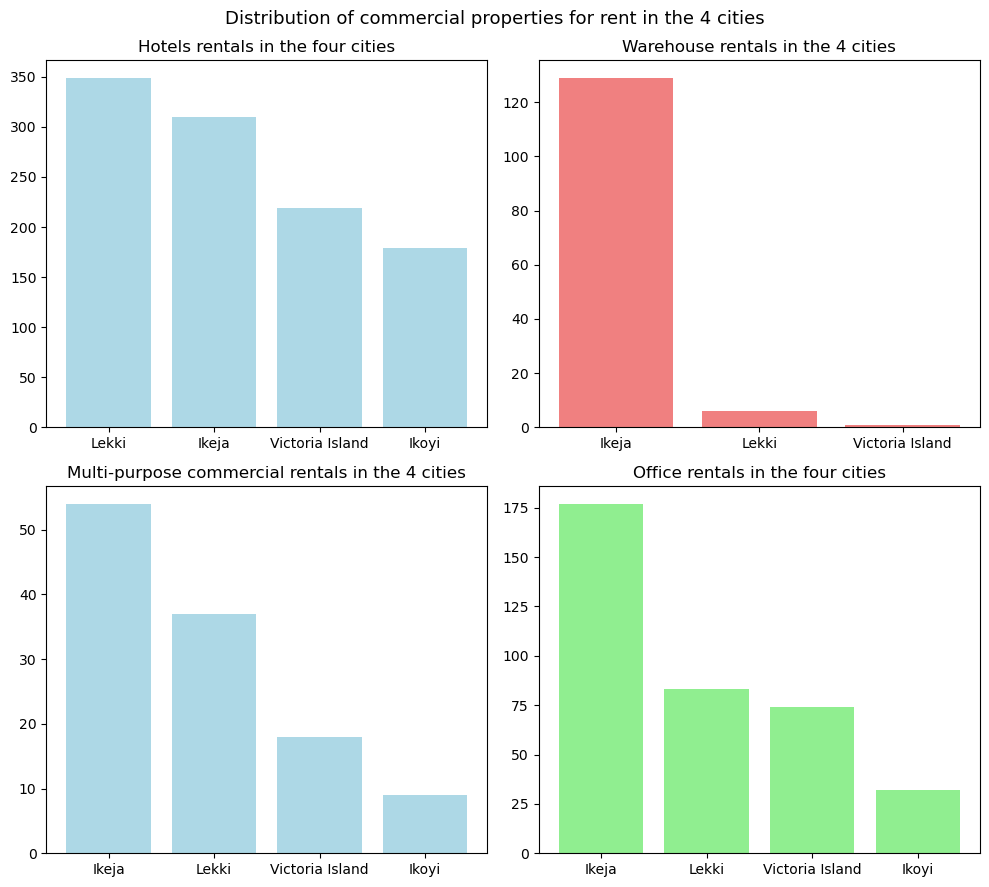

In [26]:
#Distribution of commercial properties for rent in the four cities

#hotel distribution
fig, ax=plt.subplots(2,2,figsize=(10,9))
fig.suptitle('Distribution of commercial properties for rent in the 4 cities',fontsize=13)

htel=rentdata[rentdata['Property_type']=='Hotel']
htel=htel['City'].value_counts().reset_index()
htel.columns = ['City', 'Count']

ax[0,0].bar(htel.City,htel.Count,color='lightblue')
ax[0,0].set_title('Hotels rentals in the four cities')

#warehouse distribution
wrh=rentdata[rentdata['Property_type']=='Warehouse']
wrh=wrh['City'].value_counts().reset_index()
wrh.columns = ['City', 'Count']

ax[0,1].bar(wrh.City,wrh.Count,color='lightcoral')
ax[0,1].set_title('Warehouse rentals in the 4 cities')

#multi purpose commercial distribution
crm=rentdata[rentdata['Property_type']=='Commercial']
crm=crm['City'].value_counts().reset_index()
crm.columns = ['City', 'Count']

ax[1,0].bar(crm.City,crm.Count,color='lightblue')
ax[1,0].set_title('Multi-purpose commercial rentals in the 4 cities')

#Office distribution
off=rentdata[rentdata['Property_type']=='Office']
off=off['City'].value_counts().reset_index()
off.columns = ['City', 'Count']

ax[1,1].bar(off.City,off.Count,color='lightgreen')
ax[1,1].set_title('Office rentals in the four cities')

plt.tight_layout()
plt.show()


#define subplots

### Examining the average rental price of Commercial Properties by Cities

#### Generate a sample dataset by obtaining the counts of categories and cities.

In [27]:
htlr=rentdata[rentdata['Property_type']=='Hotel']
print('hotel count:',htlr['City'].value_counts())

cmr=rentdata[rentdata['Property_type']=='Commercial']
print('Commercial count:',cmr['City'].value_counts())

offr=rentdata[rentdata['Property_type']=='Office']
print('Office count:',offr['City'].value_counts())

wahr=rentdata[rentdata['Property_type']=='Warehouse']
print('Warehouse count:',wahr['City'].value_counts())

hotel count: Lekki              349
Ikeja              310
Victoria Island    219
Ikoyi              179
Name: City, dtype: int64
Commercial count: Ikeja              54
Lekki              37
Victoria Island    18
Ikoyi               9
Name: City, dtype: int64
Office count: Ikeja              177
Lekki               83
Victoria Island     74
Ikoyi               32
Name: City, dtype: int64
Warehouse count: Ikeja              129
Lekki                6
Victoria Island      1
Name: City, dtype: int64


#### Based on the value counts, Our sample for obtaining the average rent prices is as follows:
* Hotel (150)
* Commercial (10)
* Office (32)
* Warehouse (6)

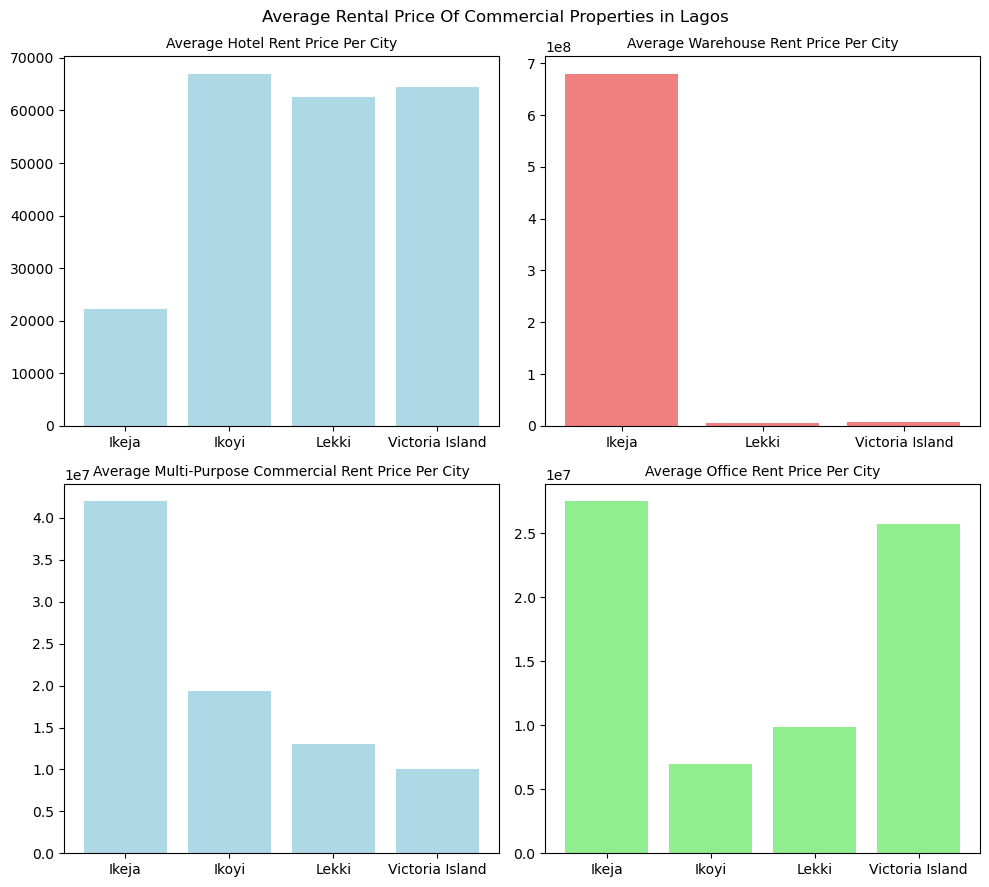

In [28]:
#define subplots 
fig, ax=plt.subplots(2,2,figsize=(10,9))
fig.suptitle('Average Rental Price Of Commercial Properties in Lagos',fontsize=12)
#Average Hotel rent per City
htlr=htlr.groupby('City').apply(lambda x: x.head(150)).reset_index(drop=True)

de=htlr.groupby(['City'])['Price'].mean()
ax[0,0].bar(de.index,de.values,color='lightblue')
ax[0,0].set_title('Average Hotel Rent Price Per City',fontsize=10)

#Average warehouse rent per city
wahr=wahr.groupby('City').apply(lambda x: x.head(6)).reset_index(drop=True)

whe=wahr.groupby(['City'])['Price'].mean()
ax[0,1].bar(whe.index,whe.values,color='lightcoral')
ax[0,1].set_title('Average Warehouse Rent Price Per City',fontsize=10)

#Average Commercial(multipurpose) rent price per city
cmr=cmr.groupby('City').apply(lambda x: x.head(10)).reset_index(drop=True)

cme=cmr.groupby(['City'])['Price'].mean()
ax[1,0].bar(cme.index,cme.values,color='lightblue')
ax[1,0].set_title('Average Multi-Purpose Commercial Rent Price Per City',fontsize=10)

#Average office rent price per city
offr=offr.groupby('City').apply(lambda x: x.head(32)).reset_index(drop=True)

offr=offr.groupby(['City'])['Price'].mean()
ax[1,1].bar(offr.index,offr.values,color='lightgreen')
ax[1,1].set_title('Average Office Rent Price Per City',fontsize=10)

plt.tight_layout()
plt.show()

# Measuring the performance of a commercial property investment in Lagos
### To measure the financial viability of commercial property in lagos, we will focus on two key performance metrics:
* Gross Rental Yield
* Net Operating income

#### Gross Rental Yield

In [32]:
#the GRY = (Annual Rental Income / Property Purchase Price) * 100
#we would take the average rental price of each sector and divide them by the average property purchase price of the sector
htlp=lagcom[lagcom['Property_Type']=='Hotel']
de=htlp.groupby(['City'])['Price'].mean()
#Average warehouse purchase price 



In [34]:
de.values

array([1.62588651e+09, 1.69651316e+09, 1.01432466e+09, 1.96083122e+09])